In [141]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import control.matlab as matlab

dados de simulacao

\dot{x}(t) = -2x(t)+bu(t)

x = (b/(s+2))u

In [142]:
# Definição das funções de transferência do sistema
s = matlab.tf('s')
a = 2
b = 8

ftx = b / (s + a)
ftx1 = (b * s) / ((s + a) * (s**2 + 2*s + 1))
ftx2 = b / ((s + a) * (s**2 + 2*s + 1))
ftx3 = 1 / (s**2 + 2*s + 1)

ftx

TransferFunction(array([8]), array([1, 2]))

In [143]:
# Parâmetros de simulação
N = 1000
dt = 0.1  # Taxa de amostragem
T = np.arange(0, N + dt, dt)
u = np.cos(2 * T)  # Entrada senoidal

len(T)

10001

C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\control\timeresp.py:940: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


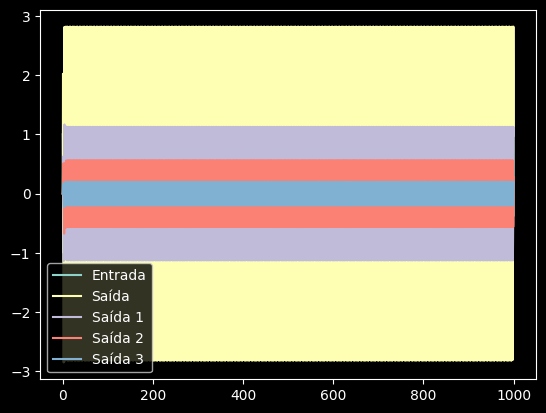

In [144]:
# Simulação dos modelos
Y, T, _ = matlab.lsim(ftx, u, T)
Y1, T, _ = matlab.lsim(ftx1, u, T)
Y2, T, _ = matlab.lsim(ftx2, u, T)
Y3, T, _ = matlab.lsim(ftx3, u, T)

# Plotagem dos resultados juntos
plt.plot(T, u, label='Entrada')
plt.plot(T, Y, label='Saída')
plt.plot(T, Y1, label='Saída 1')
plt.plot(T, Y2, label='Saída 2')
plt.plot(T, Y3, label='Saída 3')
plt.legend()

In [145]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%
# Inicialização de variáveis
theta = np.zeros((2, int(N/dt) + 1))  # Matriz para armazenar os parâmetros estimados
theta[:, 0] = [0, 0]
erro = np.zeros(int(N/dt) + 1)  # Vetor de erros
gama = np.array([[10, 0], [0, 10]])  # Matriz de ajuste
alpha = 5  # Fator de ajuste

len Y: 10001, len Y1: 10001, len Y2: 10001, len Y3: 10001, len T: 10001, erro: 10001, theta: (2, 10001), gama: (2, 2)


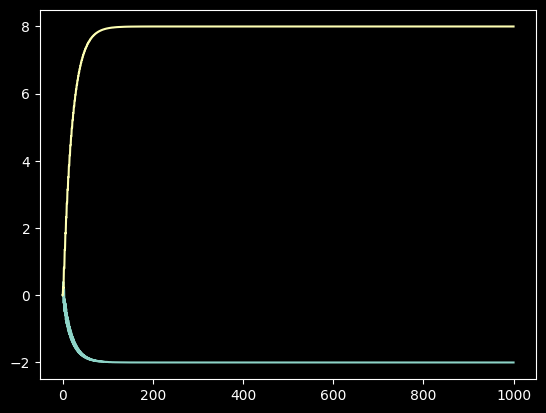

In [146]:
# Loop de iterações para o algoritmo adaptativo

for k in range(0, int(N/dt)):
    y = Y[k]
    
    # Construção do vetor phi
    phi = np.array([[Y2[k]], [Y3[k]]])
    
    # Cálculo de ms (fator de ajuste)
    ms = 1 + alpha * np.dot(phi.T, phi)[0, 0]
    
    # Atualização dos parâmetros estimados usando o algoritmo adaptativo
    delta_theta = (dt * np.dot(gama, (Y1[k] - np.dot(theta[:, k].T, phi)) * phi) / ms**2).reshape((2,))

    theta[:, k+1] = theta[:, k] + delta_theta
    erro[k+1] = (Y1[k] - np.dot(theta[:, k].T, phi))[0] / ms**2

print(f'len Y: {len(Y)}, len Y1: {len(Y1)}, len Y2: {len(Y2)}, len Y3: {len(Y3)}, len T: {len(T)}, erro: {len(erro)}, theta: {theta.shape}, gama: {gama.shape}')
# plot theta 
plt.plot(T, theta[0, :])
plt.plot(T, theta[1, :])

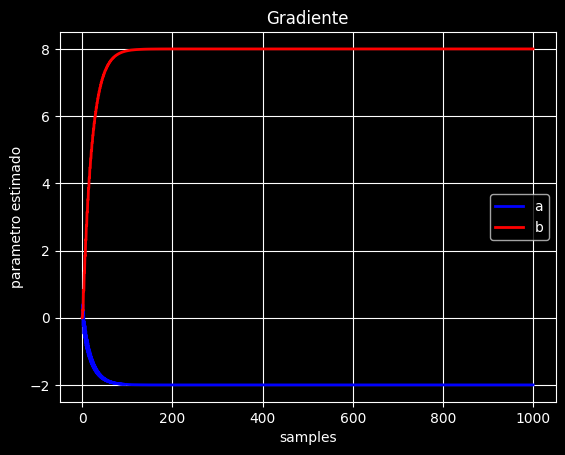

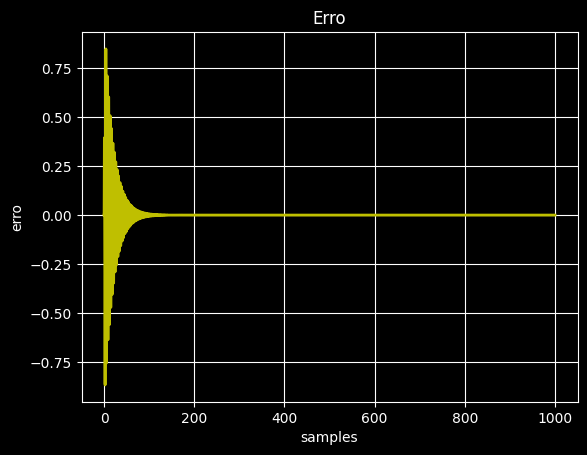

In [147]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%
# Gráfico dos parâmetros identificados e do erro

# Gráfico dos parâmetros estimados
plt.plot(T, theta[0, :], 'b', linewidth=2, label='a')
plt.plot(T, theta[1, :], 'r', linewidth=2, label='b')
plt.legend()
plt.xlabel('samples')
plt.ylabel('parametro estimado')
plt.title('Gradiente')
plt.grid(True)
plt.show()

# Gráfico do erro
plt.plot(T, erro, 'y', linewidth=2)
plt.xlabel('samples')
plt.ylabel('erro')
plt.title('Erro')
plt.grid(True)
plt.show()
